# Project: Loan Data from Prosper



> The Dataset contains 113,917 loans, each row include infomation on the borrow's APR, status, borrowed amount, debt, etc.
This investigation will be analyzing factors that influence borrow's APR and how each loan were taken by what type of borrowers.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# expand maximun number of columns 

pd.set_option('display.max_column',None)


In [3]:
# load the raw dataset
df_loan = pd.read_csv('ProsperLoanData.csv')
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
# Check dataframe information
df_loan.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# Check the statistical value
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [6]:
# Check the duplicated rows in this dataframe
df_loan.duplicated().sum()

0

#### What is the structure of your dataset?
The Prosper loan dataset contains 113,937 observations of 81 variables. The observations refer to loan listings on Prosper.com from late 2005 until 2014, and various characteristics of those loans. The data seems “tidy,” but there are still a lot work to do to wragle the data according our exploration.

#### What is/are the main feature(s) of interest in your dataset?
The Borrower's APR will be analyzied with many factors such as the borrower's rating, creditscore, occupation and Delinquencies
that could influence change in borrower's APR.
Another feature that looks interesting is Loan Status, in that some loans have performed while others have defaulted or been charged off (what I will call “non-performing”). It will be interesting to look at loan status/performance for different Occupations, Loan Origination Quarters, Prior Borrowers, and other variables. Also, with Credit Score being a proxy for risk, it will be interesting to see how loans with different Credit Scores have performed.

#### What other features in the dataset do you think will help support your investigation into your feature(s) of interest?
The Prosper Rating and score could show low Borrower's APR because higher rating reflect the borrower's personality to be more trustworthy. Creditscore could also have similar effect on Borrower's APR as Prosper Rating.

## Data Wragling

In [7]:
# Copy the orignal dataframe 
df_loan_clean = df_loan.copy()

In [8]:
#Ｄrop columns we don't need
df_loan_clean = df_loan_clean.drop(columns = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 
                                  'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 
                                  'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 
                                  'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
                                  'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 
                                  'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'])

# Drop the rows including missing data in ProsperScore and EmploymentStatusDuration columns
df_loan_clean = df_loan_clean.dropna(subset=['ProsperScore','EmploymentStatusDuration'])


In [9]:
# Check the change
df_loan_clean.shape

(84834, 61)

In [10]:
# Drop the rows including missing data in ProsperScore and EmploymentStatusDuration columns
df_loan_clean = df_loan_clean.dropna(subset=['ProsperScore','EmploymentStatusDuration'])

In [11]:
# Convert from float to int for columns 'ProsperScore','CreditScoreRangeLower','CreditScoreRangeUpper','EmploymentStatusDuration'

df_loan_clean['ProsperScore'] = df_loan_clean.ProsperScore.astype(int)
df_loan_clean['CreditScoreRangeLower'] = df_loan_clean.CreditScoreRangeLower.astype(int)
df_loan_clean['CreditScoreRangeUpper'] = df_loan_clean.CreditScoreRangeUpper.astype(int)
df_loan_clean['EmploymentStatusDuration'] = df_loan_clean.EmploymentStatusDuration.astype(int)

# Convert from int to str for columns'CreditScoreRangeLower','CreditScoreRangeUpper'
df_loan_clean['CreditScoreRangeLower'] = df_loan_clean.CreditScoreRangeLower.astype(str)
df_loan_clean['CreditScoreRangeUpper'] = df_loan_clean.CreditScoreRangeUpper.astype(str)

In [12]:
# LoanStatus
df_loan_clean["LoanStatus"].value_counts()


Current                   56566
Completed                 19657
Chargedoff                 5334
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [13]:
# We will redefinite the 11 loan status as three status depending on the loaner loss or make money
#  Current: Current, Past Due
#  Defaulted: Defaulted, Chargedoff  
#  Completed : Completed, FinalPaymentInProgress
df_loan_clean["LoanStatus"] = df_loan_clean["LoanStatus"].replace('Chargedoff',"Defaulted")
df_loan_clean["LoanStatus"] = df_loan_clean["LoanStatus"].replace('Past Due (1-15 days)',"Current")
df_loan_clean["LoanStatus"] = df_loan_clean["LoanStatus"].replace('Past Due (16-30 days)',"Current")
df_loan_clean["LoanStatus"] = df_loan_clean["LoanStatus"].replace('Past Due (31-60 days)',"Current")
df_loan_clean["LoanStatus"] = df_loan_clean["LoanStatus"].replace('Past Due (61-90 days)',"Current")
df_loan_clean["LoanStatus"] = df_loan_clean["LoanStatus"].replace('Past Due (91-120 days)',"Current")
df_loan_clean["LoanStatus"] = df_loan_clean["LoanStatus"].replace('Past Due (>120 days)',"Current")
df_loan_clean["LoanStatus"] = df_loan_clean["LoanStatus"].replace('FinalPaymentInProgress',"Completed")

In [14]:
# Check the change
df_loan_clean["LoanStatus"].value_counts()

Current      58633
Completed    19862
Defaulted     6339
Name: LoanStatus, dtype: int64

In [15]:
# Add one column"CreditScoreRange"
df_loan_clean['CreditScoreRange'] = df_loan_clean['CreditScoreRangeUpper'] + "-" + df_loan_clean['CreditScoreRangeLower'] 
df_loan_clean['CreditScoreRange'].value_counts()

679-660    14130
699-680    14015
719-700    13607
739-720    11033
659-640     8846
759-740     7870
779-760     5252
799-780     3705
819-800     2107
639-620     1650
839-820     1042
619-600     1040
859-840      398
879-860      122
899-880       17
Name: CreditScoreRange, dtype: int64

In [16]:
# Save the wrangled dataframe as csv
df_loan_clean.to_csv("ProsperLoanDataclean.csv", index = False)

In [17]:
# Check the change
df_loan_clean.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 1 to 113936
Data columns (total 62 columns):
Term                                  84834 non-null int64
LoanStatus                            84834 non-null object
BorrowerAPR                           84834 non-null float64
BorrowerRate                          84834 non-null float64
LenderYield                           84834 non-null float64
EstimatedEffectiveYield               84834 non-null float64
EstimatedLoss                         84834 non-null float64
EstimatedReturn                       84834 non-null float64
ProsperRating (numeric)               84834 non-null float64
ProsperRating (Alpha)                 84834 non-null object
ProsperScore                          84834 non-null int32
ListingCategory (numeric)             84834 non-null int64
BorrowerState                         84834 non-null object
Occupation                            83507 non-null object
EmploymentStatus                      84834 no

**Observation:** There are 84834 loans entries and 62 attributes saved after data wragling.Each loan contain information on the borrowered's background information and details regarding the loans.

##  Data Exploration

#### We will analyze the features which effect the the borrower's APR and the factors you think will reflect the borrowers' credits to be more trustworthy.


## Univariate Exploration


### BorrowAPR(Histogram)

In [18]:
# check where APR has the most counts
df_BorrowerAPR = pd.DataFrame(df_loan_clean.BorrowerAPR.value_counts()).sort_values(by='BorrowerAPR', ascending= False).reset_index()
df_BorrowerAPR.columns=['BorrowerAPR','BorrowerAPR Count']
df_BorrowerAPR.head(10)

,BorrowerAPR,BorrowerAPR Count
0,0.35797,3671
1,0.35643,1644
2,0.30532,902
3,0.29510,747
4,0.35356,720
5,0.15833,650
6,0.24246,605
7,0.24758,601
8,0.12528,559
9,0.15324,547


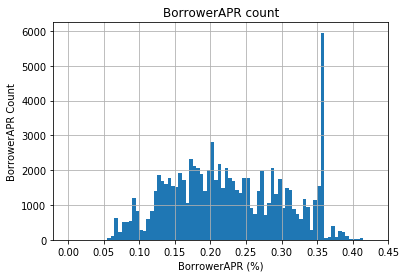

In [19]:
# Plot BorrowerAPR histogram
bins = np.arange(0, df_BorrowerAPR['BorrowerAPR'].max(), 0.005)
x =  df_loan_clean['BorrowerAPR']
df_loan_clean['BorrowerAPR'].hist(bins=bins)
# Set title,ylabel,xlabel and xticks
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('BorrowerAPR Count')
plt.xticks(np.arange(0, df_BorrowerAPR['BorrowerAPR'].max()+0.05, 0.05));
# Save plot
plt.savefig("image/BorrowerAPR count.png")

**Observation:** We can see borrowers' APR is between 0.045830% to 0.423950%, The highest density of borrowers is at 0.357(2329 people)

### Loan Stutus(Horizontal Bar Chart)

In [20]:
# Loan status
df_loan_clean["LoanStatus"].value_counts()

Current      58633
Completed    19862
Defaulted     6339
Name: LoanStatus, dtype: int64

In [21]:
# Defaulted rating in completed loans
Defaulted_rating_pct = round(6339/(19862+ 6339)*100,2)
print(f"Observation: There are {Defaulted_rating_pct}% defaulted loans in completed loans")

Observation: There are 24.19% defaulted loans in completed loans


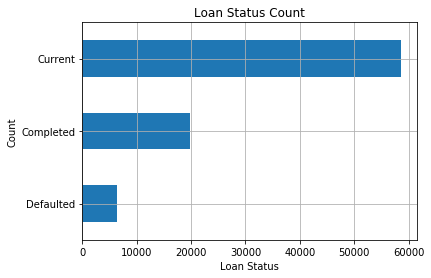

In [22]:
# Plot the bar chart
df_loan_clean["LoanStatus"].value_counts()[3::-1].plot(kind="barh")
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.grid()

# Save plot
plt.savefig("image/LoanStatus Count.png")

### Defaulted Loans Ration in Each ProsperRating  Level


In [23]:
# Extract completed loans data from the whole dataset
df_completed = df_loan_clean[ df_loan_clean["LoanStatus"]!= 'Current']
defaulted_count = df_completed[df_completed["LoanStatus"]== 'Defaulted'].groupby('ProsperRating (Alpha)').LoanStatus.count()
completed_count = df_completed.groupby('ProsperRating (Alpha)').LoanStatus.count()
Defaulted_pct = defaulted_count/completed_count *100


In [24]:
# Convert completed_count to dataframe and sort the values
Defaulted_pct_df = pd.DataFrame(Defaulted_pct).reset_index()
Defaulted_pct_df.columns=["ProsperRating (Alpha)", "Percentage"]
Defaulted_pct_df= Defaulted_pct_df.sort_values(by='Percentage',ascending= False)
Defaulted_pct_df

,ProsperRating (Alpha),Percentage
6,HR,37.997330
5,E,34.282755
4,D,28.435697
3,C,21.806854
2,B,17.233294
0,A,11.123318
1,AA,4.623955


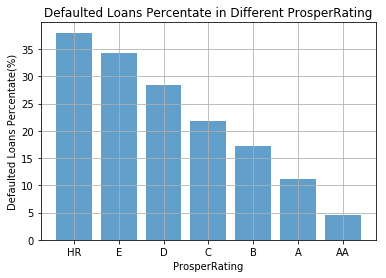

In [25]:
# plot bar chart 
y_height= Defaulted_pct_df['Percentage']
x_pos = [i for i in range(len(Defaulted_pct_df))]
plt.bar(x_pos, y_height, align='center', alpha=0.7)
plt.xticks(x_pos, Defaulted_pct_df['ProsperRating (Alpha)'])
plt.grid()
plt.title("Defaulted Loans Percentate in Different ProsperRating")
plt.xlabel("ProsperRating")
plt.ylabel("Defaulted Loans Percentate(%)")
 # Save plot
plt.savefig("image/Defaulted Loans Percentate in Different ProsperRating.png")

**Observation** The higher ProsperRating, the lower ration of defaulted loans

###  Defaulted Loans Ration in Each CreditScore Level

In [26]:
defaulted_count_2 = df_completed[df_completed["LoanStatus"]== 'Defaulted'].groupby('CreditScoreRange').CreditScoreRange.count()
# There are no defaulted loans in the CreditScorerange "899-880", we append "0" in defaulted_count_2 
defaulted_count_2['899-880']=0
defaulted_count_2

CreditScoreRange
619-600     220
639-620     327
659-640     863
679-660    1106
699-680     994
719-700     948
739-720     699
759-740     515
779-760     327
799-780     201
819-800      93
839-820      33
859-840       9
879-860       4
899-880       0
Name: CreditScoreRange, dtype: int64

In [27]:
completed_count_2 = df_completed.groupby('CreditScoreRange').CreditScoreRange.count()
completed_count_2 

CreditScoreRange
619-600     595
639-620     921
659-640    2926
679-660    3860
699-680    3706
719-700    3546
739-720    3099
759-740    2608
779-760    1879
799-780    1385
819-800     879
839-820     490
859-840     213
879-860      82
899-880      12
Name: CreditScoreRange, dtype: int64

In [28]:
# Convert completed_count to dataframe 
Defaulted_pct_2 = round(defaulted_count_2/completed_count_2 *100,2)


In [29]:
# Sort the values
Defaulted_pct_df_2 = pd.DataFrame(Defaulted_pct_2)
Defaulted_pct_df_2 = Defaulted_pct_df_2.rename(columns={'CreditScoreRange':"Percentage"})
Defaulted_pct_df_2 = Defaulted_pct_df_2.sort_values(by='Percentage',ascending= False)
Defaulted_pct_df_2


,Percentage
CreditScoreRange,
619-600,36.97
639-620,35.50
659-640,29.49
679-660,28.65
699-680,26.82
719-700,26.73
739-720,22.56
759-740,19.75
779-760,17.40


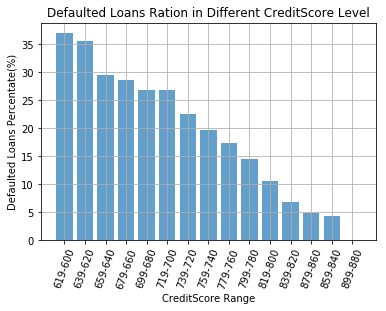

In [30]:
# plot bar chart 
y_height= Defaulted_pct_df_2['Percentage']
x_pos = [i for i in range(len(Defaulted_pct_df_2))]
plt.bar(x_pos, y_height, align='center', alpha=0.7)
plt.xticks(x_pos, Defaulted_pct_df_2.index,rotation = 70)
plt.grid()
plt.title("Defaulted Loans Ration in Different CreditScore Level")
plt.xlabel("CreditScore Range")
plt.ylabel("Defaulted Loans Percentate(%)")
 # Save plot
plt.savefig("image/Defaulted Loans Ration in Different CreditScore Level.png")

**Observation:** The higher credit score the borrower have, the fewer defaulted loans they bring. There was even no defaulted loans for the borrower with 800-899

### Occupation(Pie Chart)

In [31]:
# The top 10 occupations of borrowers

# Filter the rows with null value in "occupation" column
df_loan_clean_1 = df_loan_clean.dropna(subset=['Occupation'])
df_Occupation = pd.DataFrame(df_loan_clean_1['Occupation'].value_counts()).reset_index()
df_Occupation.columns=['Occupation','Occupation Count']
df_Occupation.head(10)


,Occupation,Occupation Count
0,Other,21317
1,Professional,10539
2,Executive,3468
3,Computer Programmer,3236
4,Teacher,2888
5,Analyst,2735
6,Administrative Assistant,2707
7,Accountant/CPA,2574
8,Sales - Commission,2350
9,Skilled Labor,2179


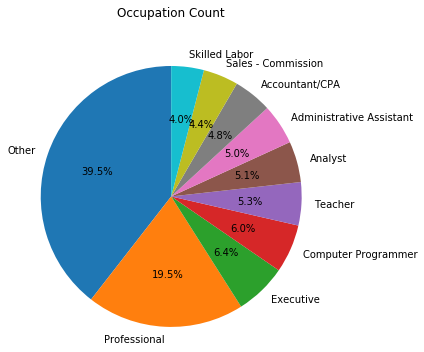

In [32]:
# Plot a pie chart for the top 10 occupation of borrowers
plt.pie(df_Occupation['Occupation Count'][:10], labels= df_Occupation['Occupation'][:10], startangle=90, autopct='%.1f%%', radius=1.5)
plt.title('Occupation Count',loc='center', y=1.3)
# Save plot
plt.savefig("image/Occupation Count.png")



**Observation:** Most borrowers enter their occupations as "others" or "professional" because they might not want to share this information. The rest of the occupations do not show big increase compare to others.

###  Delinquencies records (Histogram)

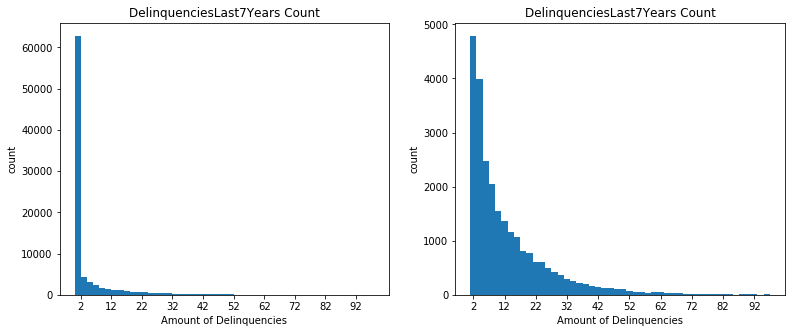

In [40]:
# Histogram for Delinquencies records count from the Last 7Years. 

plt.figure(figsize = [13, 5]) 

plt.subplot(1, 2, 1)
bins = np.arange(0, df_loan_clean['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = df_loan_clean, x = 'DelinquenciesLast7Years', bins = bins)
plt.xticks(np.arange(2, 100+1, 10))
plt.title('DelinquenciesLast7Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(1, df_loan_clean['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = df_loan_clean, x = 'DelinquenciesLast7Years', bins = bins)
plt.xticks(np.arange(2, 100+1, 10))
plt.title('DelinquenciesLast7Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');
plt.savefig("image/DelinquenciesCount.png")

**Observation:** Most borrowers has no Delinquencies records. Another plot is ploted to exclude borrowers with 0 Delinquencies record. The counts seems to be decreased exponentially with higher number of Delinquencies.

### ProsperRating vs BorrowerAPR mean

In [41]:
ProsperRating_mean = df_loan_clean.groupby('ProsperRating (Alpha)').BorrowerAPR.mean()
ProsperRating_mean_df = pd.DataFrame(ProsperRating_mean)
ProsperRating_mean_df = ProsperRating_mean_df.sort_values(by="BorrowerAPR",ascending = False) 

ProsperRating_mean_df


,BorrowerAPR
ProsperRating (Alpha),
HR,0.356059
E,0.330551
D,0.280584
C,0.226124
B,0.184031
A,0.138910
AA,0.090034


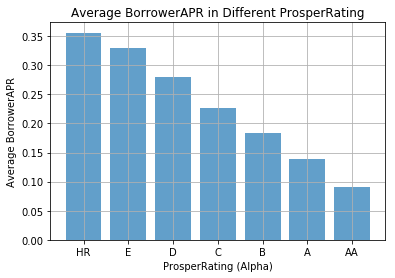

In [42]:
# Plot the bar chart
y_height= ProsperRating_mean_df['BorrowerAPR']
x_pos = [i for i in range(len(ProsperRating_mean_df))]
plt.bar(x_pos, y_height, align='center', alpha=0.7)
plt.xticks(x_pos, ProsperRating_mean_df.index)
plt.grid()
plt.title("Average BorrowerAPR in Different ProsperRating")
plt.xlabel("ProsperRating (Alpha)")
plt.ylabel("Average BorrowerAPR")
 # Save plot
plt.savefig("image/Average BorrowerAPR in Different ProsperRating.png")



 
**Observation:** Borrowers Rating are displayed in order from highest rating to lowest rating (AA, A, B, C, D, E, HR). We can see a pattern that the highest rating of AA received lowest average APR (0.09), whereas the lowerest rating received the highest average APR (0.356). 



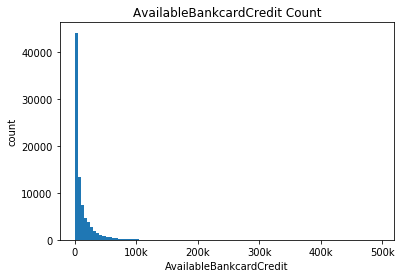

In [43]:
# see counts for AvailableBankcardCredit

bins = np.arange(0, df_loan_clean['AvailableBankcardCredit'].max(), 5000)
plt.hist(data = df_loan_clean, x = 'AvailableBankcardCredit', bins = bins)
plt.xticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, '100k', '200k', '300k', '400k', '500k'])
plt.title('AvailableBankcardCredit Count')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('count');
plt.savefig("image/AvailableBaknCreditCount.png")

**Observation** Most AvailableBankcardCredit counts fall in values from 0 to 100k. Clearly there are few percent of people who have higher bank total credits than majority of people.


In [44]:
# Drop the loan case in which borrowers have AvailableBankcardCredit>150000
High_credit_df = df_loan_clean[df_loan_clean['AvailableBankcardCredit']>150000]
df_loan_clean_3 = df_loan_clean[df_loan_clean['AvailableBankcardCredit']<=150000]
Low_credit_df = df_loan_clean[df_loan_clean['AvailableBankcardCredit']<=20000]  
print(f"There are {len(High_credit_df)} borrowers with very high AvailableBankcardCredit(greater than 150k)")
print(f"There are {len(Low_credit_df)} borrowers with low AvailableBankcardCredit(less than 20k)")
df_loan_clean_3 = df_loan_clean[df_loan_clean['AvailableBankcardCredit']<150000]

There are 113 borrowers with very high AvailableBankcardCredit(greater than 150k)
There are 69645 borrowers with low AvailableBankcardCredit(less than 20k)


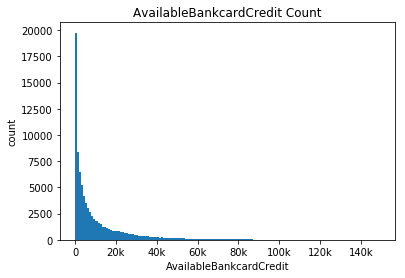

In [45]:
# plot again for AvailableBankcardCredit count with new filter data

bins = np.arange(0, df_loan_clean_3['AvailableBankcardCredit'].max(), 1000)
plt.hist(data =df_loan_clean_3, x = 'AvailableBankcardCredit', bins = bins)
plt.xticks([0, 2e4, 4e4, 6e4, 8e4, 1e5, 1.2e5, 1.4e5],
           [0, '20k', '40k', '60k', '80k', '100k', '120k', '140k'])
plt.title('AvailableBankcardCredit Count')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('count');


**Observation:"**  The variables are explored for more understanding of Borrower's APR. From AvailableBankcardCredit count plot shown above, most borrowers has AvailableBankcardCreditare within 1000k. 82% borrowers has AvailableBankcardCreditare less than  20k(69645).There are 113 borrowers with vailableBankcardCreditare higher than 150k were removed from the data because they are away from most of the data point shown in the plot.



#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

    The variables are explored for more understanding of Borrower's APR. From AvailableBankcardCredit count plot shown above, most borrowers has AvailableBankcardCreditare within 1000k. There are 113 borrowers with AvailableBankcardCreditare higher than 150k were removed from the data because they are away from most of the data point shown in the plot. Also, looking at BorrowerAPR count, there are two BorrowerAPR counts that were higher than rest of the values. Due to high number counts falling into those two values, there might be resonable reasons these two values are used. Therefore, the two BorrowerAPR values are kept untouched.
     

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

    The countplots for ProsperScore Delinquencies, Last7Years and AvailableBankcardCreditare are right skewed. CreditScoreRangeUpper & CreditScoreRangeLower follow a normal distribution curve.



## Bivariate Exploration


C:\Users\fawnz\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


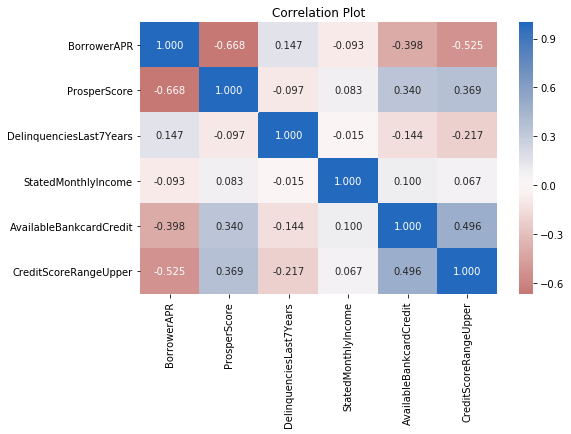

<Figure size 432x288 with 0 Axes>

In [46]:
# correlation plot 
# Change CreditScoreRangeUpper from str to int
df_loan_clean_3['CreditScoreRangeUpper'] = df_loan_clean_3.CreditScoreRangeUpper.astype(int)
num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

plt.figure(figsize = [8, 5])
sb.heatmap(df_loan_clean_3[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

plt.savefig("image/Correlation.png")

**Observation:** There are no strong positive relationships between any pairs. It makes sense because higher AvailableBankcardCredit has better creditscore. BorrowerAPR and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. Similarly, higher CreditScore means the borrowers are more trustworthy, therefore it recevied lower APR.


## Scatter plot to explore pair up all above variables.

C:\Users\fawnz\anaconda\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


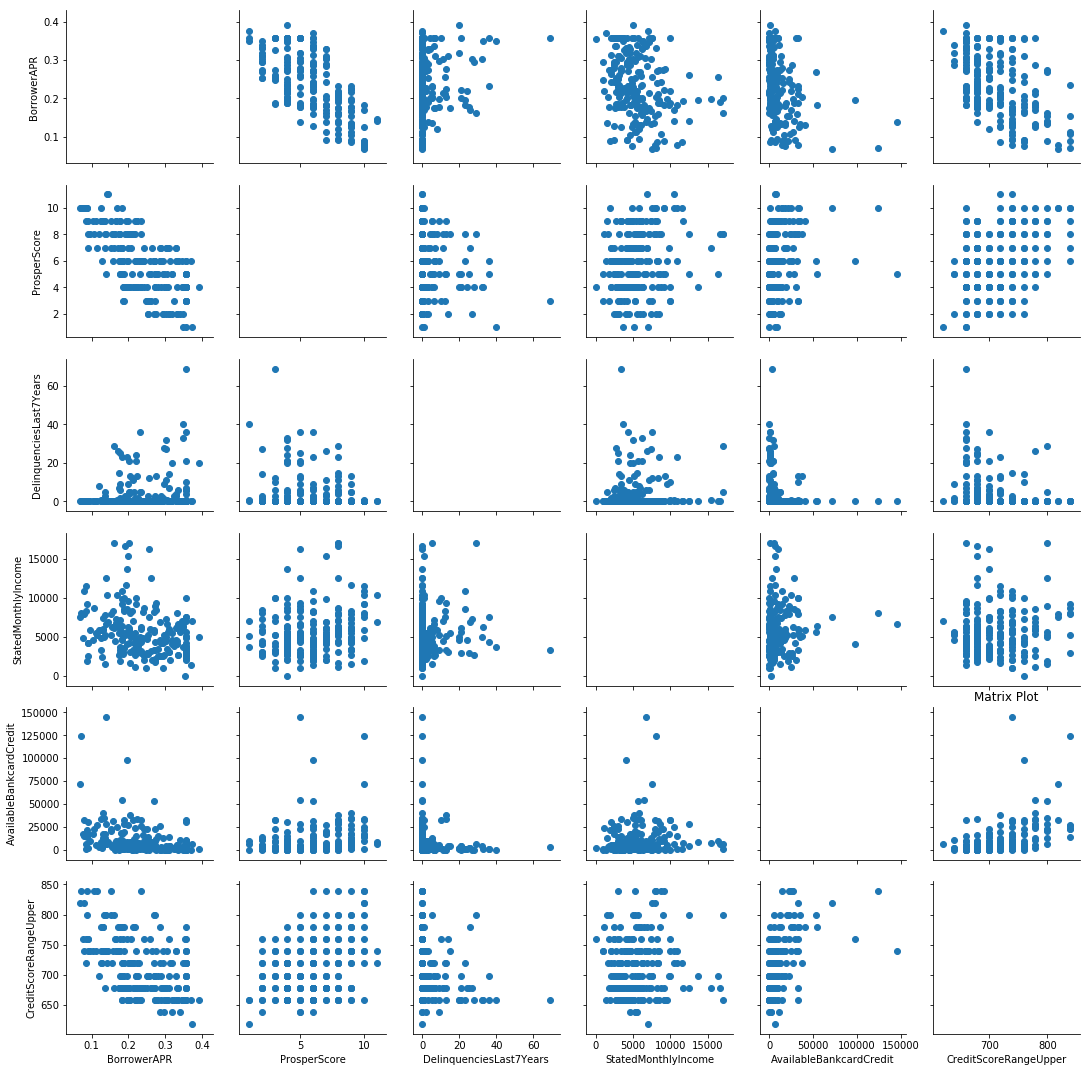

In [47]:
# plot matrix: only 300 random loans are used to see the pattern more clearer


num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

samples = np.random.choice(df_loan_clean_3.shape[0], 300, replace = False)
loan_samp = df_loan_clean_3.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = num_vars)
g.map_offdiag(plt.scatter)
plt.title('Matrix Plot');

plt.savefig("image/correlation2.png")

**Observation:**  Similar to the correlation plot, we can determine which pair has negative or positive relationships from analyzing the pattern in each scatter plots. ProsperScore seems to be more related to BorrowerAPR compare to other variables. StatedMonthlyIncome does not give useful information on BorrowerAPR and will not be further analyzed.



### More plots to look at ProsperScore vs BorrowerAPR more closely

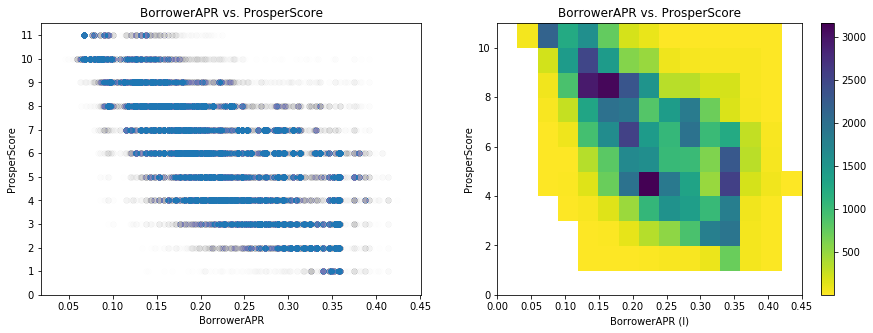

In [48]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_clean_3, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan_clean_3['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_loan_clean_3['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_loan_clean_3, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

plt.savefig("image/BorrowerAPR_ProsperScore.png")

**Observation:** People with higher rating tend to be more reliable and therefore given lower BorrowerAPR 


### BorrowerAPR vs. ProsperRating & ProsperScore

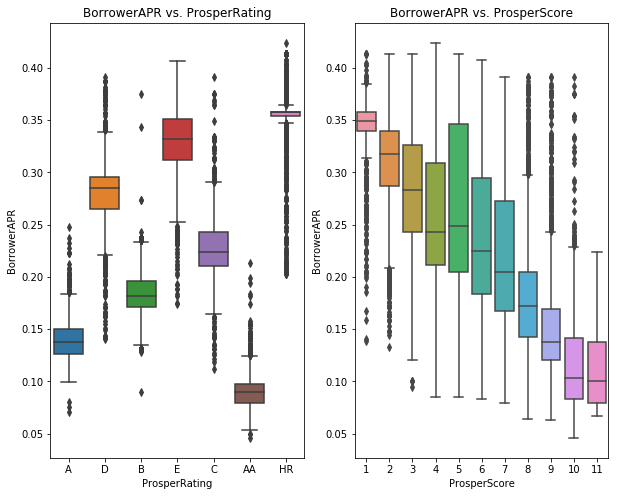

In [49]:
# Violin plot for BorrowerAPR vs. ProsperRating & ProsperScore. Shows higher rating has lower BorrowerAPR
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
sb.boxplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR')
plt.gcf().set_size_inches(10, 8)
plt.title('BorrowerAPR vs. ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerAPR')

plt.subplot(1, 2, 2)
sb.boxplot(data = df_loan_clean, x = 'ProsperScore', y = 'BorrowerAPR')
plt.gcf().set_size_inches(10, 8)
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

plt.savefig("image/BorrowerAPR_ProsperRating.png")

**Observation:** For these two categorical variables, there is not much correlation on ProsperRating. Good or bad rating doesn't reflect the percentage of APR the borrower will get. For ProsperScore, there are clearly negative relationship with BorrowerAPR as discussed in Univariate Exploration.



#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

    The correlation and matrix plots are really helpful to preview all possibles variables related on BorrowerAPR we can trying to analyize. Out of all variables, ProsperScore has stronger relationship with BorrowerAPR (negative correlated). Univariate Exploration helps to examine data points and statistics about our variables. By looking into Bivariate Exploration, it is more clearly to gain more understanding and answer questions about BorrowerAPR.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

    The CreditScoreRangeUpper, AvailableBankcardCredit and CreditScoreRangeUpper are all positive correlated to ProsperScore and negative correlated to BorrwerAPR.



## Multivariate Exploration


### FacetGrid: BorrowerAPR vs ProsperScore

C:\Users\fawnz\anaconda\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


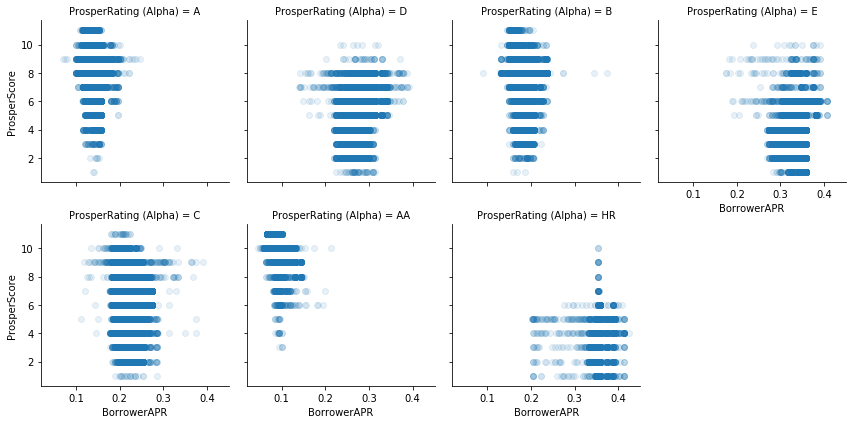

<Figure size 432x288 with 0 Axes>

In [50]:
g = sb.FacetGrid(data = df_loan_clean_3, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')

plt.show()

plt.savefig("image/Correlation3.png")

**Observation:** This visualization helps to analyze BorrowerAPR vs ProsperScore on difference letter ratings. The patterns shows the lowerest rating(HR) of borrowers have the highest APR. For high rating A(A), the borrowers has the lowers APR. This 
visualization differenate groups of people in terms of APR received based on their rating and scores.

### BorrowerAPR vs. CreditScoreRangeUpper & ProsperScore

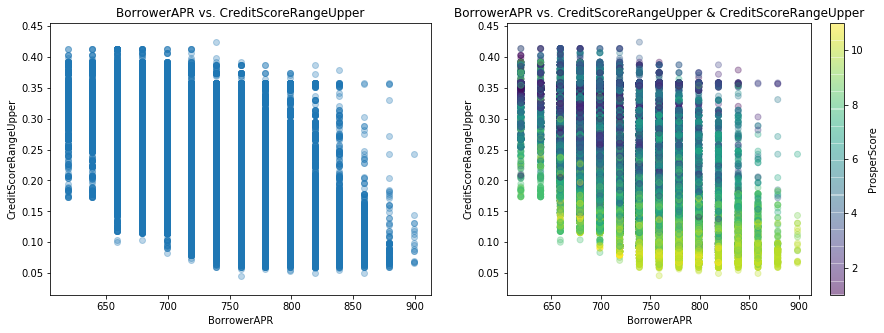

In [51]:

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_clean_3, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.3)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
plt.scatter(data = df_loan_clean_3, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

plt.savefig("image/BorrowerAPR_CreditScoreRangeUpper.png")

**Observation:** We can see the CreditScoreRangeUpper increase as BorrowerAPR decrease in the plots. By adding ProsperScore to color encodings, BorrowerAPR decreases as ProsperScore increases. This proves the point that CreditScoreRangeUpper and ProsperScore negatively correlated to BorrowerAPR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The correlation and matrix plots in previous plots can also be counted as part of Multivariate Exploration. To be more efficient, these two plots can be done ealier part of exploration to preview all variables and how they interact to each other. Adding to that, FacetGrid shows how each rating groups differ in terms of BorrowerAPR vs ProsperScore.

>From all above visualizations created from univariate exploration to multivariate exploration, many variable are found to be negatively correlated to BorrowerAPR, whereas ProspoerScore gives the strongest negative relationship.



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The correlation and matrix plots are really helpful to preview all possibles variables related on BorrowerAPR we can trying to analyize. Out of all variables, ProsperScore has stronger relationship with BorrowerAPR (negative correlated). Univariate Exploration helps to examine data points and statistics about our variables. By looking into Bivariate Exploration, it is more clearly to gain more understanding and answer questions about BorrowerAPR. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


> The CreditScoreRangeUpper, AvailableBankcardCredit and CreditScoreRangeUpper are all positive correlated to ProsperScore and negative correlated to BorrwerAPR.